In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split, KFold

In [29]:
df = pd.read_csv("../data/ArchiveII.csv")
df["fam"] = df["id"].str.split("_").str[0]
df_ = df.query("len <= 128")
df_

,id,sequence,structure,base_pairs,len,fam
0,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,5s
1,5s_Acidovorax-temperans-1,UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...,.(((((((((.....((((((((.....((((((...............,"[[2, 115], [3, 114], [4, 113], [5, 112], [6, 1...",115,5s
3,tRNA_tdbR00000055-Schizosaccharomyces_pombe-48...,UCCGUUGUGGUCCAACGGCUAGGAUUCGUCGCUUUCACCGACGGGA...,(((((((..((((........))))((((((.......)))))).....,"[[1, 71], [2, 70], [3, 69], [4, 68], [5, 67], ...",75,tRNA
5,5s_Methanothermobacter-thermautotrophicus-6,GGGGCAUGGCGGUCAUGGCGCAGGGGUUAUACCUGAUCUCGUUUCG...,.((((.(((((((....(((((((......((((((.............,"[[2, 127], [3, 125], [4, 124], [5, 123], [7, 1...",128,5s
6,srp_Vibr.fisc._CP000020,UGGGGCUCUGGUCCUCUCGCAACAAUAGUUCGUGAACUCGGUCAGG...,(((((((((((((.((((((.((((..((((((.....((((.......,"[[1, 104], [2, 103], [3, 102], [4, 101], [5, 1...",111,srp
...,...,...,...,...,...,...
3857,5s_Pseudomonas-stutzeri-2,GCUUGACGACCAUAGAGCGUUGGAACCACCUGAUCCCAUCCCGAAC...,(((((((((.....((((((((.....((((((................,"[[1, 119], [2, 117], [3, 116], [4, 115], [5, 1...",120,5s
3859,5s_Bacillus-cereus-6,UGGUAAUGAUGGCAGAGAGGUCACACCCGUUCCCAUACCGAACACG...,((((((.....((((((((.....((((((.............)))...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",114,5s
3860,srp_Myco.aviu._AE016958,GGGGACCCCGCGCACCCGACAGAGCCCGUUGACCCUUGCUGCCUUC...,((((.....(.(...(.(.....(.(....).).....).).).)....,"[[1, 53], [2, 52], [3, 51], [4, 50], [10, 45],...",88,srp
3862,5s_Triticum-aestivum-1,GGAUGCGAUCAUACCAGCACUAAAGCACCGGAUCCCAUCAGAACUC...,(((((((((....(((((((......((((((............))...,"[[1, 118], [2, 117], [3, 116], [4, 115], [5, 1...",120,5s


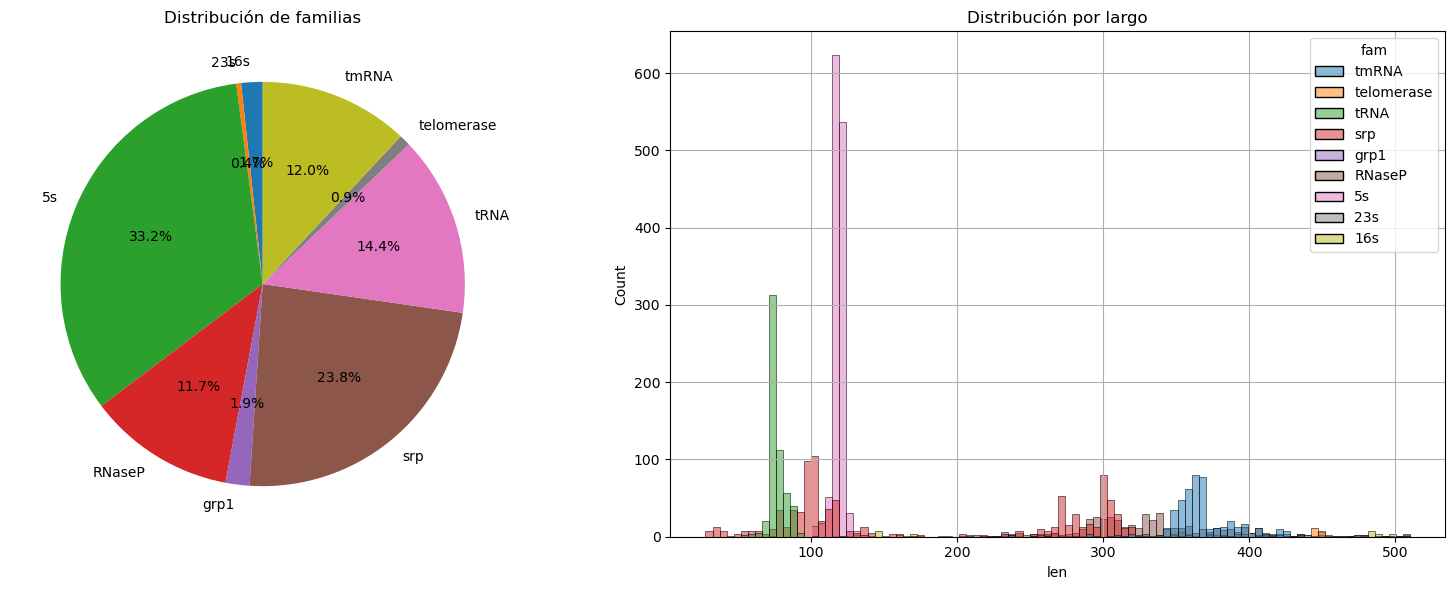

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

count0 = df.groupby("fam")["id"].agg("count").reset_index()
count0.sort_values("fam", ascending=False)
# Configurar la figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de torta
axes[0].pie(count0["id"], labels=count0["fam"], autopct="%1.1f%%", startangle=90)
axes[0].set_title("Distribución de familias")

# Histograma con Seaborn
sns.histplot(
    data=df.sort_values("fam", ascending=False),
    x="len",
    hue="fam",
    bins=100,
    ax=axes[1],
)
axes[1].set_title("Distribución por largo")
axes[1].grid()
plt.tight_layout()
plt.show()

In [31]:
df["len"].mean()

193.91589026915113

In [32]:
print(f"No max len (Max = {df['len'].max()})")
print(f'Mean len: {df["len"].mean().round(1)}')
print(df["fam"].value_counts())
print("Max len = 128")

print(f'Mean len: {df_["len"].mean().round(1)}')
print(df_["fam"].value_counts())

No max len (Max = 510)
Mean len: 193.9
fam
5s            1283
srp            918
tRNA           557
tmRNA          462
RNaseP         454
grp1            74
16s             66
telomerase      35
23s             15
Name: count, dtype: int64
Max len = 128
Mean len: 103.3
fam
5s        1269
tRNA       557
srp        494
16s          4
tmRNA        1
RNaseP       1
Name: count, dtype: int64


In [36]:
df_ = df_.query('fam not in ["16s", "tmRNA", "RNaseP"]')
# df_.to_csv('data/ArchiveII_max_length_128.csv', index=False)

In [58]:
count = df_.groupby("fam")["id"].agg("count").reset_index()
count.sort_values("fam", ascending=False)

,fam,id
2,tRNA,557
1,srp,494
0,5s,1269


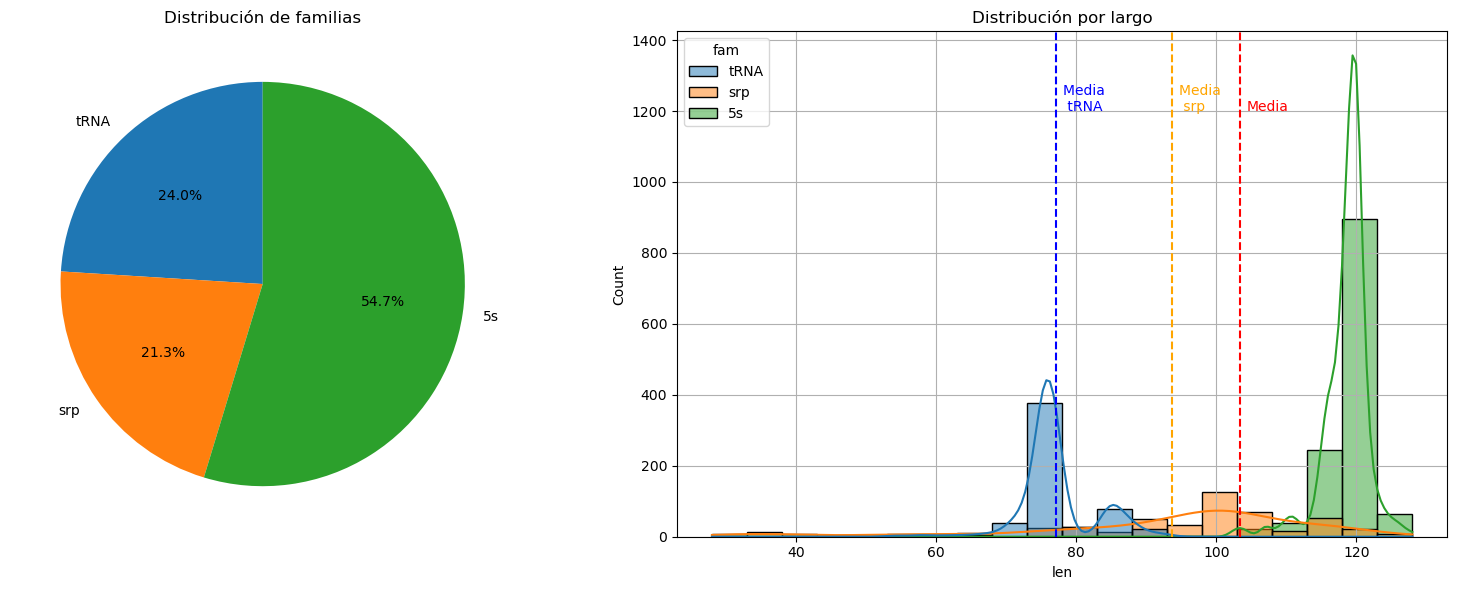

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar la figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de torta
axes[0].pie(
    count.sort_values("fam", ascending=False)["id"],
    labels=count.sort_values("fam", ascending=False)["fam"],
    autopct="%1.1f%%",
    startangle=90,
)
axes[0].set_title("Distribución de familias")

# Histograma con Seaborn
sns.histplot(
    data=df_.sort_values("fam", ascending=False),
    x="len",
    hue="fam",
    bins=20,
    kde=True,
    ax=axes[1],
)
axes[1].axvline(df_["len"].mean(), color="red", linestyle="--", label="mean")
axes[1].text(df_["len"].mean() + 1, 1200, "Media", color="red")

axes[1].axvline(
    df2["test_srp"]["len"].mean(), color="orange", linestyle="--", label="mean"
)
axes[1].text(df2["test_srp"]["len"].mean() + 1, 1200, "Media \n srp", color="orange")


axes[1].axvline(
    df2["test_tRNA"]["len"].mean(), color="blue", linestyle="--", label="mean"
)
axes[1].text(df2["test_tRNA"]["len"].mean() + 1, 1200, "Media \n tRNA", color="blue")
axes[1].set_title("Distribución por largo")
axes[1].grid()
plt.tight_layout()
plt.show()

In [55]:
df2 = {}
df2["test_srp"] = df_.query("fam == 'srp'")
df2["no_srp"] = df_.query("fam != 'srp'")
df2["train_srp"], df2["valid_srp"] = train_test_split(df2["no_srp"], test_size=0.2)

In [56]:
df2["test_tRNA"] = df_.query("fam == 'tRNA'")
df2["no_tRNA"] = df_.query("fam != 'tRNA'")
df2["train_tRNA"], df2["valid_tRNA"] = train_test_split(df2["no_tRNA"], test_size=0.2)

In [15]:
# for kind in ["srp", "tRNA"]:
#     df2["train_" + kind].to_csv(
#         f"../data/ArchiveII-KFold/fam-split/train_{kind}.csv", index=False
#     )
#     df2["valid_" + kind].to_csv(
#         f"../data/ArchiveII-KFold/fam-split/valid_{kind}.csv", index=False
#     )
#     df2["test_" + kind].to_csv(
#         f"../data/ArchiveII-KFold/fam-split/test_{kind}.csv", index=False
#     )

In [17]:
df2.keys()

dict_keys(['test_srp', 'no_srp', 'train_srp', 'valid_srp', 'test_tRNA', 'no_tRNA', 'train_tRNA', 'valid_tRNA'])

In [32]:
print("Mean len:")
for k in [
    "train_srp",
    "valid_srp",
    "test_srp",
    "train_tRNA",
    "valid_tRNA",
    "test_tRNA",
]:
    print(f"{k}: {df2[k]['len'].mean().round(1)}")

Mean len:
train_srp: 106.1
valid_srp: 105.3
test_srp: 93.7
train_tRNA: 111.7
valid_tRNA: 111.4
test_tRNA: 77.1
